> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [1]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [9]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1
     X_rows , X_cols = X.shape
     K_rows , K_cols = K.shape
     Y = np.zeros(( X_rows-K_rows+1 , X_cols-K_cols+1 ))
     for i in range(Y.shape[0]):
       for j in range(Y.shape[1]):
        Y[i][j] = np.sum ( X [ i:i+K_rows , j:j+K_cols ] * K )
     return Y

In [10]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [11]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    X_channels, X_rows, X_cols = X.shape
    K_channels, K_rows, K_cols = K.shape
  
    Z = np.zeros((X_rows-K_rows+1 , X_cols-K_cols+1))
    Y = np.zeros(((X_rows - K_rows + 1, X_cols - K_cols + 1)))
    for c in range (X_channels):
      X_channels = X[c,:,:]
      K_channels = K[c,:,:]
      Y = corr2d(X_channels,K_channels)
      Z=Z+Y
    return Z

In [14]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))

# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [15]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    Output_channels = K.shape[0]
    Output_h = X.shape[1] - K.shape[2] + 1
    Output_w = X.shape[2] - K.shape[3] + 1
    
    Output = np.zeros((Output_channels, Output_h, Output_w))

    for i in range(Output_channels):
      Output[i] = corr2d_multiple_input_channels(X, K[i])

    return Output  
    

In [16]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [17]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [21]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [22]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [29]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
     X_rows , X_cols = X.shape
     K_rows , K_cols = K
     Y = np.zeros(( X_rows-K_rows+1 , X_cols-K_cols+1 ))
     for i in range(Y.shape[0]):
       for j in range(Y.shape[1]):
         Y[i][j] = np.max( X[i : i + K_rows ,j : j + K_cols ])
     return Y

In [30]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [32]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


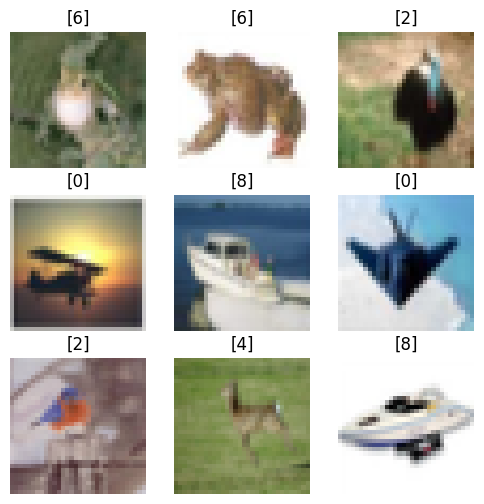

In [34]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [35]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

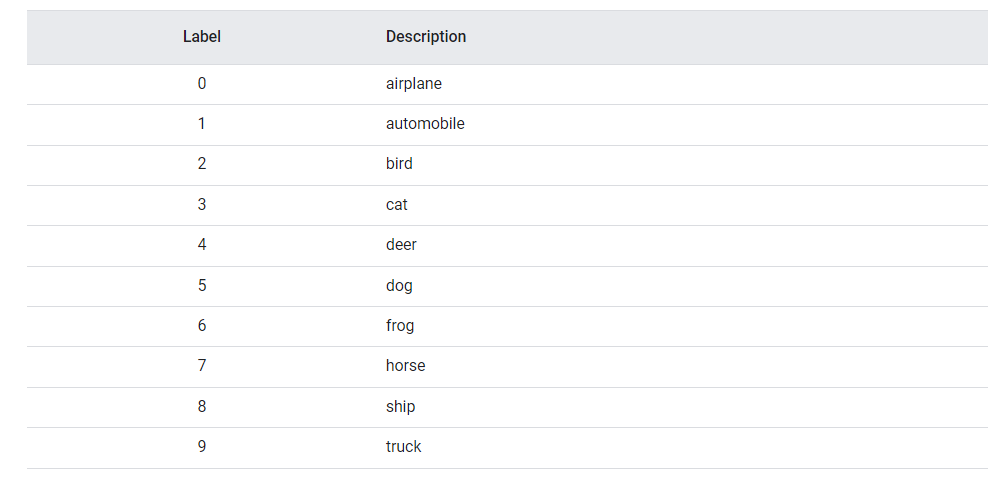

In [36]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [37]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [38]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [39]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:
The Adam optimizer is an advanced algorithm used in machine learning and deep learning to train neural networks more effectively. It combines ideas from two other optimization methods called momentum and RMSprop.

In regular gradient descent optimization, the learning rate remains fixed during training. However, Adam optimizer adjusts the learning rate for each parameter based on estimates of the gradients' first and second moments. This adaptive learning rate helps overcome the limitations of fixed rates, leading to faster convergence and improved performance.

The main concept behind Adam optimizer is to keep track of both the gradients and the squared gradients over time. By doing so, it creates a running average of the gradients' behavior, similar to momentum optimization. This helps the optimizer to maintain a consistent direction even when individual gradients differ significantly. Additionally, it uses the running average of squared gradients as a form of adaptive learning rate, which scales the step sizes for each parameter.

The steps of the Adam optimizer algorithm are as follows:
1. Start with initializing variables for the first and second moment estimates.
2. Calculate the gradients of the objective function with respect to the parameters.
3. Update the first moment by combining it with the gradients using a decay rate (beta1).
4. Update the second moment by combining it with the squared gradients using a decay rate (beta2).
5. Correct any bias in the first and second moment estimates.
6. Update the parameters by scaling the gradients with the adaptive learning rate computed from the first and second moment estimates.

The values of the hyperparameters beta1 and beta2 control how quickly the running averages decay. Commonly used values are 0.9 for beta1 and 0.999 for beta2. It is also necessary to set an initial learning rate, which can be adjusted based on the specific problem and data characteristics.

Overall, the Adam optimizer is highly favored due to its ability to handle sparse gradients, provide adaptive learning rates, and achieve quick convergence. It has gained popularity in training deep neural networks and has shown excellent performance across various applications.
"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:\nThe Adam optimizer is an advanced algorithm used in machine learning and deep learning to train neural networks more effectively. It combines ideas from two other optimization methods called momentum and RMSprop.\n\nIn regular gradient descent optimization, the learning rate remains fixed during training. However, Adam optimizer adjusts the learning rate for each parameter based on estimates of the gradients' first and second moments. This adaptive learning rate helps overcome the limitations of fixed rates, leading to faster convergence and improved performance.\n\nThe main concept behind Adam optimizer is to keep track of both the gradients and the squared gradients over time. By doing so, it creates a running average of the gradients' behavior, similar to momentum optimization. This helps the optimizer to maintain a consistent direction even when individual gradients differ significa

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [40]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 14s 5ms/step - loss: 2.4522 - accuracy: 0.1182 - val_loss: 2.2578 - val_accuracy: 0.1694
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2073 - accuracy: 0.1889 - val_loss: 2.1299 - val_accuracy: 0.2411
Epoch 3/10
875/875 [==============================] - 3s 4ms/step - loss: 2.0184 - accuracy: 0.2660 - val_loss: 1.9307 - val_accuracy: 0.2887
Epoch 4/10
875/875 [==============================] - 3s 4ms/step - loss: 1.8746 - accuracy: 0.3142 - val_loss: 1.9136 - val_accuracy: 0.3011
Epoch 5/10
875/875 [==============================] - 4s 5ms/step - loss: 1.7975 - accuracy: 0.3418 - val_loss: 1.7604 - val_accuracy: 0.3509
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 1.7131 - accuracy: 0.3733 - val_loss: 1.7119 - val_accuracy: 0.3727
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 1.6285 - accuracy: 0.4053 - val_loss: 1.6818 - val_accuracy: 0.3880
Epoch 8/10
875/8

In [41]:
""" 
Write about validation accuracy in 100 words.

Answer: 
Validation accuracy is a metric used to assess the performance of a machine learning model on unseen data. It measures the accuracy of the model's predictions on a validation set, which is a portion of the data that is not used for training. The validation accuracy indicates how well the model generalizes to new data and helps in evaluating its effectiveness. It is calculated by dividing the number of correctly predicted samples by the total number of samples in the validation set and expressing it as a percentage. A higher validation accuracy suggests that the model is more accurate and reliable in making predictions on unseen data.
"""

" \nWrite about validation accuracy in 100 words.\n\nAnswer: \nValidation accuracy is a metric used to assess the performance of a machine learning model on unseen data. It measures the accuracy of the model's predictions on a validation set, which is a portion of the data that is not used for training. The validation accuracy indicates how well the model generalizes to new data and helps in evaluating its effectiveness. It is calculated by dividing the number of correctly predicted samples by the total number of samples in the validation set and expressing it as a percentage. A higher validation accuracy suggests that the model is more accurate and reliable in making predictions on unseen data.\n"

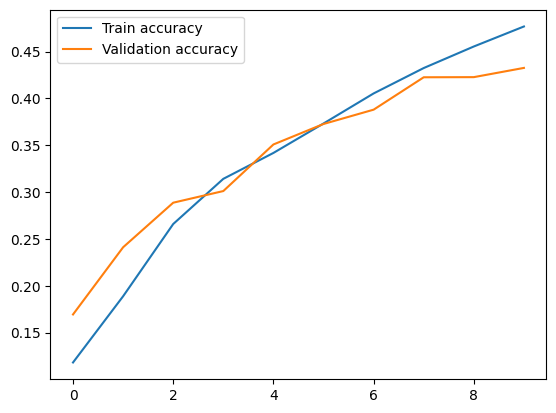

In [42]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [43]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [44]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [46]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 5s 4ms/step - loss: 2.5334 - accuracy: 0.1725 - val_loss: 1.9851 - val_accuracy: 0.2739
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 1.8475 - accuracy: 0.3286 - val_loss: 1.7099 - val_accuracy: 0.3766
Epoch 3/20
875/875 [==============================] - 4s 5ms/step - loss: 1.6419 - accuracy: 0.4092 - val_loss: 1.6343 - val_accuracy: 0.4121
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 1.5000 - accuracy: 0.4627 - val_loss: 1.5671 - val_accuracy: 0.4327
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 1.4114 - accuracy: 0.4944 - val_loss: 1.5029 - val_accuracy: 0.4603
Epoch 6/20
875/875 [==============================] - 4s 5ms/step - loss: 1.3249 - accuracy: 0.5246 - val_loss: 1.4589 - val_accuracy: 0.4820
Epoch 7/20
875/875 [==============================] - 3s 4ms/step - loss: 1.2555 - accuracy: 0.5564 - val_loss: 1.4722 - val_accuracy: 0.4954
Epoch 

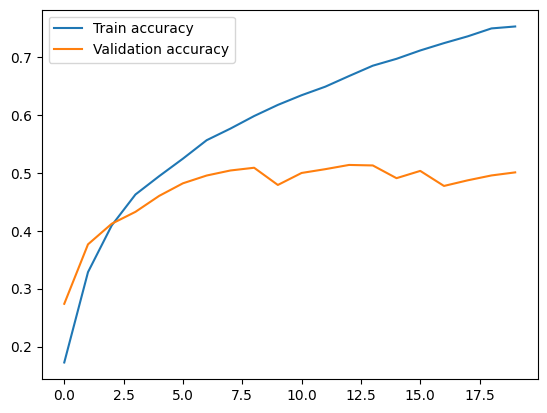

In [47]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [53]:

"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""
 
 The model has shown improvement as the training accuracy increased to 0.73 and is still rising. However, the validation accuracy has plateaued at 0.52, indicating a lack of progress. This divergence between the two accuracies suggests overfitting, where the model becomes too specialized in the training data and fails to generalize well to unseen data. Therefore, the model is performing well on the training set but struggles to work effectively on the validation set, indicating the need for further adjustments to mitigate overfitting.


IndentationError: ignored

In [54]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

# please take note of this change: 
**[For all the subjective questions after this question( in the ss ) you need put the link of articles that you referred while searching about the question.]**\
Ideally you should refer to at least 2 articles for each of those questions.\
Also you do not need to go into deep maths of those( a qualitative answer is what we will be looking for)

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [55]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )
source - chat gpt and google
Answer: Overfitting and underfitting are two common phenomena in machine learning that describe the behavior of a model in relation to the training and test data.

Overfitting occurs when a model becomes overly complex and starts to memorize the training data instead of learning the underlying patterns. This leads to poor generalization to unseen data, as the model becomes too specialized in the training examples. In an overfitting scenario, the model may perform extremely well on the training data but fails to perform well on new, unseen data. The model essentially "over-adapts" to the noise or peculiarities of the training data, resulting in reduced performance when presented with different examples. Overfitting can be caused by having too many parameters or features relative to the available training data, which allows the model to capture even random variations or outliers.

On the other hand, underfitting occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the data. An underfit model is unable to capture the complexity of the relationships present in the data and thus performs poorly both on the training and test data. In this case, the model is "under-adapting" and fails to grasp the relevant features necessary to make accurate predictions. Underfitting can occur when the model is too simplistic, or when there is not enough training data to capture the underlying patterns.

The goal in machine learning is to find the right balance between underfitting and overfitting, known as the "sweet spot." This is achieved by selecting an appropriate model complexity and having enough diverse and representative training data. Techniques such as regularization, cross-validation, and early stopping can be employed to combat overfitting. Regularization methods introduce penalties to the model's complexity, discouraging it from over-adapting to the training data. Cross-validation helps in assessing the model's performance on multiple subsets of the data, providing a more reliable estimate of its generalization ability. Early stopping stops the training process before overfitting occurs by monitoring the model's performance on a validation set.

In summary, overfitting refers to a model that is too complex and performs well on training data but poorly on unseen data, while underfitting refers to a model that is too simple and fails to capture the underlying patterns in the data, leading to poor performance overall. Finding the right balance between the two is crucial for building models that generalize well to new, unseen data.
"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n\nAnswer: Overfitting and underfitting are two common phenomena in machine learning that describe the behavior of a model in relation to the training and test data.\n\nOverfitting occurs when a model becomes overly complex and starts to memorize the training data instead of learning the underlying patterns. This leads to poor generalization to unseen data, as the model becomes too specialized in the training examples. In an overfitting scenario, the model may perform extremely well on the training data but fails to perform well on new, unseen data. The model essentially "over-adapts" to the noise or peculiarities of the training data, resulting in reduced performance when presented with different examples. Overfitting can be caused by having too many parameters or features relative to the available training data, which allows the model to capture even random variations or outliers.\n\nOn the other hand, unde

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)
source- chatgpt , javapoint
Answer: Regularization techniques are a set of methods used in machine learning to prevent overfitting and improve the generalization performance of models. Overfitting occurs when a model becomes too complex and starts to memorize noise or peculiarities in the training data, resulting in poor performance on unseen data. Regularization techniques aim to address this issue by adding additional constraints or penalties to the learning process.

One commonly used regularization technique is L1 regularization, also known as Lasso regularization. L1 regularization adds a penalty term to the loss function that encourages the model to use only a subset of the available features, effectively promoting sparsity. This helps in feature selection by shrinking the coefficients of irrelevant or less important features towards zero.

Another popular technique is L2 regularization, also called Ridge regularization. L2 regularization adds a penalty term that is proportional to the square of the magnitude of the model's weights to the loss function. This encourages the model to have smaller and more evenly distributed weights, reducing the impact of any individual feature on the final predictions.

ElasticNet regularization combines L1 and L2 regularization by adding both penalty terms to the loss function. It provides a balance between feature selection (L1 regularization) and weight distribution (L2 regularization).

Dropout regularization is another widely used technique, particularly in deep learning. It randomly drops out a fraction of the neurons during training, forcing the remaining neurons to take on more responsibility and preventing the model from relying too heavily on specific neurons or combinations of neurons.

Early stopping is a simple regularization technique that stops the training process early based on a validation set's performance. It prevents overfitting by monitoring the model's performance on the validation set and stopping the training when the performance starts to degrade.

Regularization techniques play a crucial role in improving model generalization by reducing overfitting and increasing the model's ability to perform well on unseen data. By adding additional constraints or penalties, regularization techniques help models find a balance between fitting the training data and capturing the underlying patterns that apply to new, unseen data.
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)
source - tensorflow.org , chatgpt
Answer: The dropout layer is a regularization technique commonly used in deep learning, specifically in neural networks, to prevent overfitting. It is a popular method introduced by Geoffrey Hinton and his colleagues in 2012. In TensorFlow, the dropout layer can be implemented using the `tf.keras.layers.Dropout` class.

The dropout layer works by randomly "dropping out" (i.e., setting to zero) a fraction of the input units during training, while scaling up the remaining units by the inverse of the dropout rate. This means that the layer's output is a modified version of the input, where some units have been randomly masked out.

By randomly dropping out units, the dropout layer introduces noise and reduces the model's reliance on specific individual units. This prevents the network from overly depending on particular features and encourages the network to learn more robust and generalized representations. It effectively reduces complex co-adaptations between units, which can lead to overfitting.

During inference or testing, the dropout layer is typically turned off, and all units are active. However, the layer's output values are scaled by the dropout rate to ensure that the expected output remains similar to the training phase.

The dropout rate is a hyperparameter that determines the fraction of input units to be dropped out during training. A commonly used dropout rate is around 0.5, meaning that approximately 50% of the input units are dropped out at each training iteration.

The dropout layer is an effective regularization technique that has been widely adopted in deep learning models. By reducing overfitting and promoting the learning of more robust features, dropout helps improve the model's generalization ability and performance on unseen data.
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )
source - google , chatgpt
Answer: L1 normalization, also known as L1 regularization or L1 penalty, is a technique used in machine learning to introduce a regularization term into the objective function of a model. It encourages sparsity in the model's weights by adding the sum of the absolute values of the weights to the loss function.

The formula for L1 normalization is as follows:

L1 norm = λ * ||w||₁

In the formula, λ represents the regularization strength or the penalty parameter, and ||w||₁ denotes the L1 norm of the weight vector w. The L1 norm is computed as the sum of the absolute values of each individual weight in the vector.

The L1 regularization term is added to the loss function during training, effectively penalizing the model for having large weights. By doing so, L1 normalization encourages the model to select only the most important features and discard the less relevant ones, leading to sparsity in the weight vector. This property makes L1 regularization useful for feature selection, as it tends to drive the weights of irrelevant or less important features to zero.

The effect of L1 normalization can be visualized as a diamond-shaped constraint region in the weight space. The optimal solution, which minimizes the loss function, is typically found at one of the corners of the diamond, where some weights are exactly zero. As a result, L1 normalization not only reduces overfitting by preventing the model from over-relying on certain features but also provides a form of automatic feature selection.

L1 normalization is particularly useful when dealing with high-dimensional datasets where feature sparsity is expected. It can be applied to various machine learning algorithms, including linear regression, logistic regression, and support vector machines (SVMs), among others.
"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )
source - neptune.ai, chatgpt
Answer: L2 normalization, also known as L2 regularization or L2 penalty, is a technique used in machine learning to introduce a regularization term into the objective function of a model. It aims to control the complexity of the model by adding the sum of the squared magnitudes of the weights to the loss function.

The formula for L2 normalization is as follows:

L2 norm = λ * ||w||₂²

In the formula, λ represents the regularization strength or the penalty parameter, and ||w||₂ denotes the L2 norm of the weight vector w. The L2 norm is computed as the square root of the sum of the squared magnitudes of each individual weight in the vector.

The L2 regularization term is added to the loss function during training, effectively penalizing the model for having large weights. By doing so, L2 normalization encourages the model to distribute the weights more evenly across different features, rather than relying heavily on a few dominant features. This helps prevent overfitting and improves the model's generalization ability.

The effect of L2 normalization can be visualized as a circular constraint region in the weight space. The optimal solution, which minimizes the loss function, is typically found within this circular region. L2 normalization tends to push the weights towards smaller values, reducing the impact of any individual feature on the final predictions.

L2 normalization is commonly used in many machine learning algorithms, including linear regression, logistic regression, neural networks, and support vector machines (SVMs). It is a popular choice for regularization due to its simplicity and the smoothness of the resulting optimization problem.

In addition to preventing overfitting, L2 normalization has the desirable effect of improving the model's robustness to noisy or irrelevant features, as it discourages large weights that may be caused by such features.

Overall, L2 normalization is an effective regularization technique that helps control model complexity, improve generalization, and enhance the model's performance on unseen data.
"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )
source -datacamp.com, chatgpt 
Answer: Data augmentation techniques are methods used in machine learning to artificially increase the size and diversity of a training dataset by creating new training examples. It involves applying various transformations or modifications to the existing data, such as rotation, scaling, flipping, cropping, or adding noise. The augmented data is then used to train the machine learning model.

Data augmentation is needed in machine learning for several reasons:

1. Increased training data: By augmenting the dataset, the effective size of the training data is expanded. This is particularly useful when the original dataset is small or limited, as it provides the model with more diverse examples to learn from. More data can help improve the model's ability to generalize and make accurate predictions on unseen data.

2. Improved model robustness: Data augmentation introduces variations and perturbations to the training data, making the model more robust to different types of input. It helps prevent overfitting by exposing the model to a wider range of data patterns and reducing its sensitivity to specific variations in the training set.

3. Reduced overfitting: Overfitting occurs when a model becomes too specialized in the training data and performs poorly on new, unseen data. Data augmentation helps alleviate overfitting by providing additional examples that capture the underlying patterns while introducing controlled variations. This regularization technique encourages the model to learn more generalizable features and reduces its reliance on specific training examples.

4. Improved generalization: Data augmentation helps the model learn invariant representations that are applicable to various real-world scenarios. By simulating different conditions and transformations that may occur in real data, data augmentation enhances the model's ability to generalize and make accurate predictions in different contexts.

5. Class imbalance correction: In classification tasks where the distribution of classes is imbalanced, data augmentation can be used to balance the class representation. By generating synthetic examples for the minority class, the augmented data can help address the bias towards the majority class and improve the model's performance in accurately predicting all classes.

In summary, data augmentation techniques are crucial in machine learning as they increase the training dataset size, improve model robustness, reduce overfitting, enhance generalization, and address class imbalance. By augmenting the data, models can learn more effectively from diverse examples and perform better on unseen data, ultimately leading to improved model performance and reliability.
"""